# **Project 2: Ames Housing Data**

 **Part 1 EDA and Data Cleaning (Train)**

 **Introduction**

As real estate analysts in Iowa, we are responsible for managing our organization's real estate holdings.

We are tasked with understanding real estate market trends and to minimize current and future real estate holding risks.

We will be conducting data analysis on the Iowa real estate market and determine which are the factors that affects property prices.

The purpose of this analysis is to better understand a property price and provide suitable insights to management and potential buyers of the organization's real estate.




**Table of content**

- Import all necessary libraries
- Import train dataset 'train.csv' & 'test.csv'
- Data Cleaning  
- EDA

**1.1 Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics

%matplotlib inline

**1.2 Import Dataset**

In [2]:
# import in train data  
train_data = pd.read_csv('../project_2/datasets/train.csv')
# import in test data  
test_data = pd.read_csv('../project_2/datasets/test.csv')

In [3]:
#set display range max_rows 
pd.options.display.max_rows = 250
pd.options.display.max_columns = 250

**Train Data**

In [4]:
train_data.shape # 2051 records and 81 columns

(2051, 81)

In [5]:
train_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
train_data.info() 
#dtypes of features are appropriately assigned, 
#except for MS SubClass which should be object, not int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


Observation:
The mean sale price of a house in the train dataframe is USD181470.

The houses were built between 1872 and 2010, and sold between 2006 and 2010.

The average living area was 1499 sq ft, with the smallest house at 334 sq ft and the largest at 5642 sq ft.

The average number of rooms in a house was 6.43, with a minimum of 2 and maximum of 15.

**Test Data**

In [8]:
test_data.shape

(878, 80)

In [9]:
test_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [11]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,878.0,1.444749e+03,8.508383e+02,2.0,6.922500e+02,1433.0,2.197500e+03,2.928000e+03
PID,878.0,7.162867e+08,1.889103e+08,526302110.0,5.284841e+08,535454155.0,9.071904e+08,1.007100e+09
MS SubClass,878.0,5.826879e+01,4.223541e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,718.0,6.954596e+01,2.353394e+01,21.0,5.900000e+01,68.0,8.000000e+01,1.820000e+02
Lot Area,878.0,1.030703e+04,1.000267e+04,1477.0,7.297250e+03,9446.0,1.158900e+04,2.152450e+05
Overall Qual,878.0,6.050114e+00,1.369065e+00,2.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,878.0,5.566059e+00,1.128903e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,878.0,1.970492e+03,3.039589e+01,1880.0,1.954000e+03,1972.0,1.999750e+03,2.010000e+03
Year Remod/Add,878.0,1.984418e+03,2.045072e+01,1950.0,1.967000e+03,1992.0,2.003000e+03,2.010000e+03
Mas Vnr Area,877.0,1.062360e+02,1.871589e+02,0.0,0.000000e+00,0.0,1.720000e+02,1.378000e+03


**2.1 Data Cleaning**

In [12]:
#Changing columns names to lowercase 
train_data.columns = train_data.columns.str.lower().str.replace(' ', '_')

In [13]:
train_data.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [14]:
#test data reformat
test_data.columns = test_data.columns.str.lower().str.replace(' ', '_')
test_data.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [15]:
#Creating missing value Dataframe for train
def miss_val(df):
    data_miss = train_data.isna().sum().reset_index()
    data_miss.columns = ['feature','miss_value']
    data_miss['percent'] = round(data_miss['miss_value'] / train_data.shape[0] * 100, 2)
    data_miss = data_miss[data_miss['miss_value'] != 0]
    return data_miss

In [16]:
##Creating missing value Dataframe for test
def miss_v(df):
    data_miss = test_data.isna().sum().reset_index()
    data_miss.columns = ['feature','miss_value']
    data_miss['percent'] = round(data_miss['miss_value'] / test_data.shape[0] * 100, 2)
    data_miss = data_miss[data_miss['miss_value'] != 0]
    return data_miss

In [17]:
# Display the missing value in the training data
train_data_miss_val = miss_val(train_data)
train_data_miss_val

,feature,miss_value,percent
4,lot_frontage,330,16.09
7,alley,1911,93.17
26,mas_vnr_type,22,1.07
27,mas_vnr_area,22,1.07
31,bsmt_qual,55,2.68
32,bsmt_cond,55,2.68
33,bsmt_exposure,58,2.83
34,bsmtfin_type_1,55,2.68
35,bsmtfin_sf_1,1,0.05
36,bsmtfin_type_2,56,2.73


In [18]:
test_data_miss_v = miss_v(test_data)
test_data_miss_v

,feature,miss_value,percent
4,lot_frontage,160,18.22
7,alley,820,93.39
26,mas_vnr_type,1,0.11
27,mas_vnr_area,1,0.11
31,bsmt_qual,25,2.85
32,bsmt_cond,25,2.85
33,bsmt_exposure,25,2.85
34,bsmtfin_type_1,25,2.85
36,bsmtfin_type_2,25,2.85
43,electrical,1,0.11


In [19]:
# Set 'id' to indexes 
train_data.set_index('id', inplace= True)
train_data.sort_index(inplace=True)
train_data.shape

(2051, 80)

**2.2 Features with a smaller number of null values**

In [20]:
# Checking rows that consist one NaNs
train_data.isnull().sum()[train_data.isnull().sum() == 1]

bsmtfin_sf_1     1
bsmtfin_sf_2     1
bsmt_unf_sf      1
total_bsmt_sf    1
garage_cars      1
garage_area      1
dtype: int64

In [21]:
#looking at null values
train_data[train_data['total_bsmt_sf'].isnull()| 
      train_data['garage_area'].isnull() | 
      train_data['bsmt_unf_sf'].isnull() |
      train_data['bsmt_full_bath'].isnull()]

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000
1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [22]:
# Dropping the above stated rows that consist more than one NaN
train_data = train_data.drop([1342, 1498, 2237])

(train_data.isnull().sum())[train_data.isnull().sum() > 0].sort_values(ascending=False)

pool_qc           2039
misc_feature      1983
alley             1908
fence             1650
fireplace_qu       998
lot_frontage       330
garage_type        113
garage_yr_blt      113
garage_finish      113
garage_qual        113
garage_cond        113
bsmt_exposure       56
bsmtfin_type_2      54
bsmt_cond           53
bsmtfin_type_1      53
bsmt_qual           53
mas_vnr_area        22
mas_vnr_type        22
dtype: int64

In [23]:
train_data.shape

(2048, 80)

In [24]:
train_data_miss_val

,feature,miss_value,percent
4,lot_frontage,330,16.09
7,alley,1911,93.17
26,mas_vnr_type,22,1.07
27,mas_vnr_area,22,1.07
31,bsmt_qual,55,2.68
32,bsmt_cond,55,2.68
33,bsmt_exposure,58,2.83
34,bsmtfin_type_1,55,2.68
35,bsmtfin_sf_1,1,0.05
36,bsmtfin_type_2,56,2.73


**2.3 Imputate Missing Values**

In [25]:
# Check for any duplicates
train_data.duplicated().sum()

0

In [26]:
#checking for nulls
train_data.isnull().sum()

pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1908
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            53
bsmt_cond            53
bsmt_exposure        56
bsmtfin_type_1       53
bsmtfin_sf_1          0
bsmtfin_type_2       54
bsmtfin_sf_2          0
bsmt_unf_sf           0
total_bsmt_sf         0
heating               0
heating_qc            0
central_air     

In [27]:
#organize further 
(train_data.isnull().sum())[train_data.isnull().sum() > 0].sort_values(ascending=False)

pool_qc           2039
misc_feature      1983
alley             1908
fence             1650
fireplace_qu       998
lot_frontage       330
garage_type        113
garage_yr_blt      113
garage_finish      113
garage_qual        113
garage_cond        113
bsmt_exposure       56
bsmtfin_type_2      54
bsmt_cond           53
bsmtfin_type_1      53
bsmt_qual           53
mas_vnr_area        22
mas_vnr_type        22
dtype: int64

**2.3.1 Imputating misc_features, alley, fence with None as these features that are of high level of NaN.**

In [29]:
for i in ['misc_feature','alley','fence']:
    train_data[i] = train_data[i].fillna('None')
missing = (train_data.isnull().sum())[train_data.isnull().sum() > 0].sort_values(ascending=False)

In [30]:
missing

pool_qc           2039
fireplace_qu       998
lot_frontage       330
garage_type        113
garage_yr_blt      113
garage_finish      113
garage_qual        113
garage_cond        113
bsmt_exposure       56
bsmtfin_type_2      54
bsmt_qual           53
bsmt_cond           53
bsmtfin_type_1      53
mas_vnr_type        22
mas_vnr_area        22
dtype: int64

**2.3.2 Lot Frontage**

In [31]:
train_data['lot_frontage'].describe()

count    1718.000000
mean       69.017462
std        23.228719
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

In [32]:
#initial we have 330
train_data['lot_frontage'].isnull().sum()

330

In [33]:
#lets fill up 'lot_frontage' with 0 , column is made up of float type
train_data['lot_frontage']=train_data['lot_frontage'].fillna(0)
train_data['lot_frontage'].isnull().sum() #now is 0

0

In [34]:
(train_data.isnull().sum())[train_data.isnull().sum() > 0].sort_values(ascending=False)

pool_qc           2039
fireplace_qu       998
garage_type        113
garage_yr_blt      113
garage_finish      113
garage_qual        113
garage_cond        113
bsmt_exposure       56
bsmtfin_type_2      54
bsmt_qual           53
bsmt_cond           53
bsmtfin_type_1      53
mas_vnr_type        22
mas_vnr_area        22
dtype: int64

**2.3.3 Mas Vnr Type & Mas Vnr Area**

**Observation:**
 1. Same number of missing data
 2. Feature does not exist.
 3. NaNs for Masonry is low

In [35]:
train_data['mas_vnr_type'].unique()

array(['Stone', 'BrkFace', 'None', nan, 'BrkCmn'], dtype=object)

In [36]:
train_data['mas_vnr_area'].unique()

array([1.120e+02, 1.080e+02, 0.000e+00, 6.030e+02, 1.190e+02, 4.800e+02,
       1.800e+02, 5.040e+02, 3.810e+02, 1.620e+02, 2.000e+02, 2.260e+02,
       2.400e+02, 1.680e+02, 7.600e+02, 1.095e+03, 2.320e+02, 4.120e+02,
       1.780e+02, 1.060e+02, 1.600e+01,       nan, 1.650e+02, 3.380e+02,
       3.620e+02, 3.480e+02, 3.000e+01, 5.790e+02, 3.600e+01, 1.220e+02,
       3.100e+01, 2.500e+02, 1.200e+02, 2.160e+02, 4.320e+02, 2.890e+02,
       2.800e+01, 4.200e+01, 4.510e+02, 2.680e+02, 8.600e+01, 3.400e+02,
       1.100e+02, 1.640e+02, 3.610e+02, 5.060e+02, 1.500e+02, 2.200e+02,
       3.240e+02, 2.610e+02, 2.180e+02, 3.510e+02, 2.940e+02, 3.000e+02,
       4.700e+01, 1.430e+02, 2.880e+02, 9.600e+01, 3.360e+02, 1.770e+02,
       8.500e+01, 2.460e+02, 7.200e+01, 2.400e+01, 3.200e+02, 4.790e+02,
       4.420e+02, 1.700e+02, 1.090e+02, 9.800e+01, 2.030e+02, 4.400e+01,
       1.860e+02, 3.350e+02, 6.000e+01, 8.400e+01, 1.880e+02, 1.600e+02,
       2.200e+01, 4.000e+01, 3.440e+02, 7.480e+02, 

In [37]:
# As NaNs for Masonry is low, I would fill houses with no Masonry as zero area
train_data['mas_vnr_type'] = train_data['mas_vnr_type'].fillna('None')
train_data['mas_vnr_area'] = train_data['mas_vnr_area'].fillna(0)

In [38]:
(train_data.isnull().sum())[train_data.isnull().sum() > 0].sort_values(ascending=False)

pool_qc           2039
fireplace_qu       998
garage_type        113
garage_yr_blt      113
garage_finish      113
garage_qual        113
garage_cond        113
bsmt_exposure       56
bsmtfin_type_2      54
bsmt_qual           53
bsmt_cond           53
bsmtfin_type_1      53
dtype: int64

**2.3.4 Basement**

In [39]:
# posibility some house that do not have basement
for i in ['bsmtfin_type_2','bsmtfin_type_1']:
    train_data[i] = train_data[i].fillna('None')
(train_data.isnull().sum())[train_data.isnull().sum() > 0].sort_values(ascending=False)

pool_qc          2039
fireplace_qu      998
garage_type       113
garage_yr_blt     113
garage_finish     113
garage_qual       113
garage_cond       113
bsmt_exposure      56
bsmt_qual          53
bsmt_cond          53
dtype: int64

**2.3.5 Garage**

In [40]:
# There seem to be the same number of NaNs that are associated with garage 
# 113 rows may be housings that do not have garage
train_data['garage_finish'] = train_data['garage_finish'].fillna('None')
train_data['garage_yr_blt'] = train_data['garage_yr_blt'].fillna('None')
train_data['garage_type'] = train_data['garage_type'].fillna('None')
(train_data.isnull().sum())[train_data.isnull().sum() > 0].sort_values(ascending=False)

pool_qc          2039
fireplace_qu      998
garage_qual       113
garage_cond       113
bsmt_exposure      56
bsmt_qual          53
bsmt_cond          53
dtype: int64

**2.3.6 filling up the rest with None**

In [43]:
# Variables with Ex, Gd, TA, Fa, & Po
for x in ['exter_qual','exter_cond','kitchen_qual', 'heating_qc']:
    train_data[x] = train_data[x].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
    
for i in ['exter_qual','exter_cond','kitchen_qual', 'heating_qc']:
    train_data[i] = train_data[i].fillna('None')
    
    
# Variables with Ex, Gd, TA, Fa, Po, & NA
for y in ['bsmt_qual','bsmt_cond','fireplace_qu', 'garage_qual', 'garage_cond']:
    train_data[y] = train_data[y].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NA':0})

for i in ['bsmt_qual','bsmt_cond','fireplace_qu', 'garage_qual', 'garage_cond']:
    train_data[i] = train_data[i].fillna('None')
    
    
# Exposure 
train_data['bsmt_exposure'] = train_data['bsmt_exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})
train_data['bsmt_exposure'] = train_data['bsmt_exposure'].fillna('None')

# Pool_qc
train_data['pool_qc'] = train_data['pool_qc'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'NA':0})
train_data['pool_qc'] = train_data['pool_qc'].fillna('None')

In [45]:
# Check for any more nulls
(train_data.isnull().sum())[train_data.isnull().sum() > 0]

Series([], dtype: int64)

**2.3.7 SalePrice**

In [48]:
#Check saleprice column
train_data.saleprice.isnull().sum()

0

In [49]:
train_data.saleprice.dtype

dtype('int64')

**2.3.8 Checking Train_data null value correction**

In [50]:
train_data.isnull().sum().sum()

0

In [51]:
train_data.head(3)

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,log_saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,None,None,CBlock,None,None,None,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,None,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,None,7,Typ,2,None,Attchd,1960.0,Fin,2.0,528.0,None,None,P,210,62,0,0,0,0,None,None,None,0,5,2010,WD,215000,12.278393
3,526351010,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,None,None,CBlock,None,None,None,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,None,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,None,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,None,None,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,172000,12.055250
5,527105010,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,None,None,PConc,None,None,None,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,None,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,None,6,Typ,1,None,Attchd,1997.0,Fin,2.0,482.0,None,None,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,189900,12.154253


In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 1 to 2930
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              2048 non-null   int64  
 1   ms_subclass      2048 non-null   int64  
 2   ms_zoning        2048 non-null   object 
 3   lot_frontage     2048 non-null   float64
 4   lot_area         2048 non-null   int64  
 5   street           2048 non-null   object 
 6   alley            2048 non-null   object 
 7   lot_shape        2048 non-null   object 
 8   land_contour     2048 non-null   object 
 9   utilities        2048 non-null   object 
 10  lot_config       2048 non-null   object 
 11  land_slope       2048 non-null   object 
 12  neighborhood     2048 non-null   object 
 13  condition_1      2048 non-null   object 
 14  condition_2      2048 non-null   object 
 15  bldg_type        2048 non-null   object 
 16  house_style      2048 non-null   object 
 17  overall_qual  

# Exploratory Data Analysis

**2.4.1 Plot**

In [47]:
# apply log
train_data['log_saleprice'] = train_data['saleprice'].map(np.log)

**2.4.1 The Distribution of SalesPrice**

In [53]:
train_data.shape

(2048, 81)

In [57]:
sns.set_style('darkgrid')

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


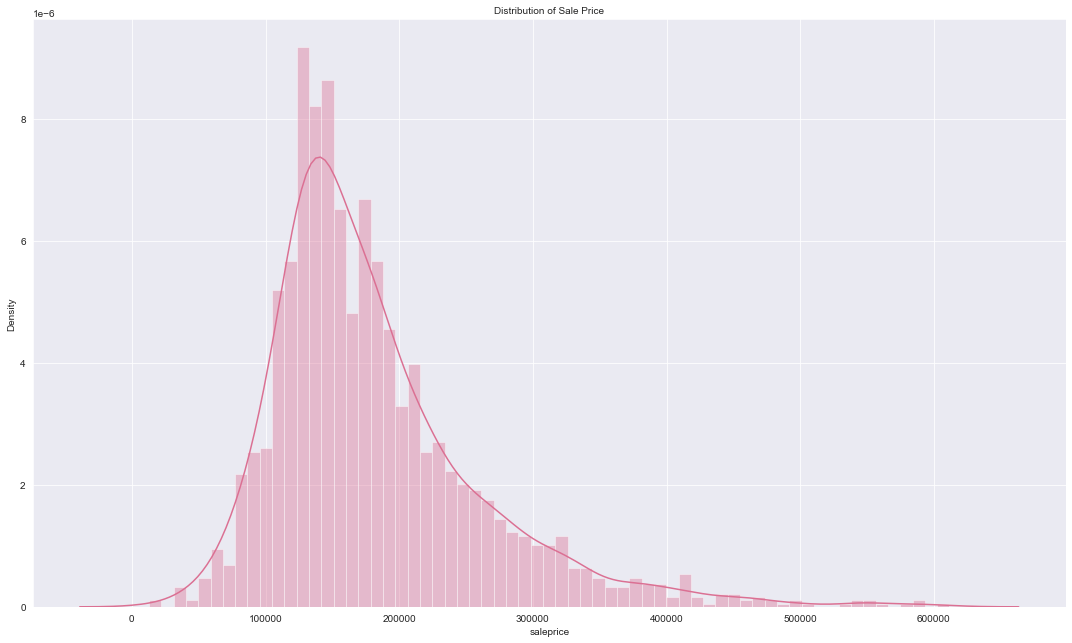

In [61]:
plt.figure(figsize =(15,9))
sns.distplot(train_data['saleprice'], kde= True, bins=65, color = 'palevioletred')
plt.tight_layout()
plt.title('Distribution of Sale Price', fontsize = 10);

Shown on the graph, it is positively skewed. Median sales price was 162500

**2.4.2 Heatmap**

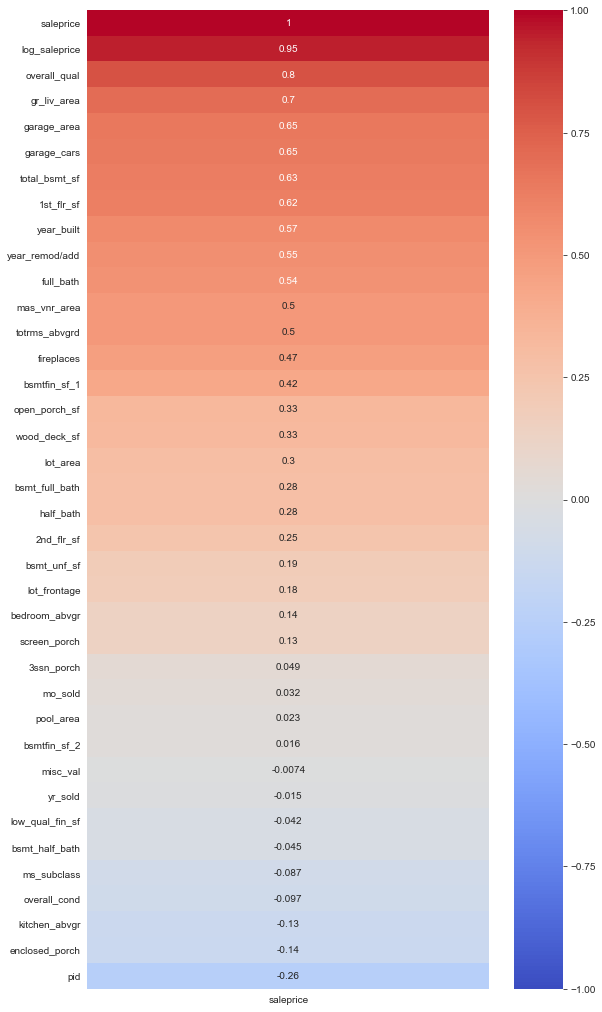

In [64]:
# Variables has highest positive correlation against Sale Price
plt.figure(figsize=(9,18))
sns.heatmap(train_data.corr()[['saleprice',
#                              'garage_cars',
#                              'gr_liv_area',
#                              'total_bsmt_sf',
#                              'log_saleprice'
                            ]].sort_values(by='saleprice', ascending = False), 
            cmap = 'coolwarm', 
            vmin = -1,
            annot = True,
           );

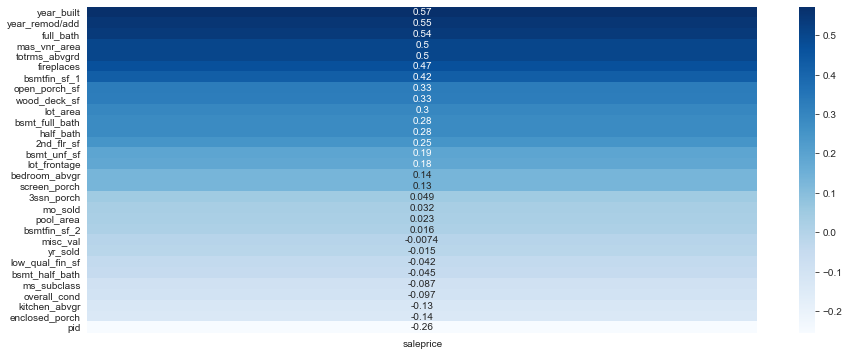

In [65]:
# Variables has highest negative correlation against Sale Price
plt.figure(figsize = (15,6))
neg_corr = train_corr.tail(30)
sns.heatmap(neg_corr, annot = True, cmap='Blues');

**2.4.3 Scatterplots**

In [74]:
train_data.corr()['saleprice'].sort_values(ascending=False).head(13)

saleprice         1.000000
log_saleprice     0.946093
overall_qual      0.800975
gr_liv_area       0.698046
garage_area       0.650000
garage_cars       0.648103
total_bsmt_sf     0.631507
1st_flr_sf        0.621181
year_built        0.572256
year_remod/add    0.550055
full_bath         0.537369
mas_vnr_area      0.504025
totrms_abvgrd     0.502909
Name: saleprice, dtype: float64

In [76]:
train_data.corr()['saleprice'].sort_values(ascending=False).tail(16)

lot_frontage       0.181342
bedroom_abvgr      0.135178
screen_porch       0.134652
3ssn_porch         0.048755
mo_sold            0.031868
pool_area          0.023115
bsmtfin_sf_2       0.016393
misc_val          -0.007398
yr_sold           -0.015330
low_qual_fin_sf   -0.041650
bsmt_half_bath    -0.045378
ms_subclass       -0.087383
overall_cond      -0.097118
kitchen_abvgr     -0.125593
enclosed_porch    -0.135516
pid               -0.255293
Name: saleprice, dtype: float64

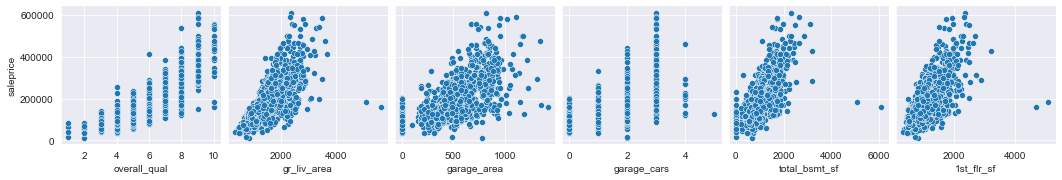

In [78]:
# top correlation coefficient values 
# >= +0.6 <= -0.6 
sns.pairplot(train_data,
             y_vars = ['saleprice'],
             x_vars = ['overall_qual', 'gr_liv_area', 
                        'garage_area', 'garage_cars', 
                       'total_bsmt_sf', '1st_flr_sf']);

**2.4.4 Boxplots**

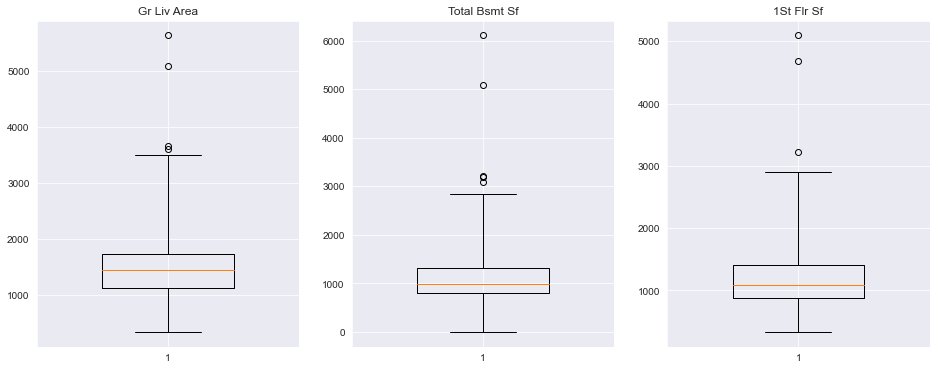

In [70]:
#using boxplot to highlight the outliers
box_list = ['gr_liv_area', 
            'total_bsmt_sf', 
            '1st_flr_sf']

fig, ax = plt.subplots(1,3,figsize=(16, 6))
ax = ax.ravel()

for i, col in enumerate(box_list): 
    ax[i].boxplot(train_data[col], widths=[0.5], whis=3)
    ax[i].set_title(col.replace('_',' ').title(),fontsize=12)

**2.4.5 Outlier**

In [79]:
#Taking a closer look at gr_liv_area, total_bsmt_sf, 1st_flr_sf
#These property are indeed the outliers hence choosing to remove them

print((train_data['gr_liv_area'])[train_data['gr_liv_area'] > 3500])
print((train_data['1st_flr_sf'])[train_data['1st_flr_sf'] > 3500])
print((train_data['total_bsmt_sf'])[train_data['total_bsmt_sf'] > 3500])

id
1499    5642
2181    5095
2667    3608
2738    3672
Name: gr_liv_area, dtype: int64
id
1499    4692
2181    5095
Name: 1st_flr_sf, dtype: int64
id
1499    6110.0
2181    5095.0
Name: total_bsmt_sf, dtype: float64


In [81]:
train_data.shape

(2048, 81)

In [83]:
train_data.drop([1499, 2181, 2667, 2738], inplace=True)

In [84]:
train_data.shape

(2044, 81)

**Export dataframes to csv**

In [85]:
#Saving cleaned Data
train_data.to_csv('D:/GA/DSI3lab/dsi3test/project_2/datasets/train_final.csv')